$\textbf{Importing packages}$

In [2]:
#importing packages
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt
import datetime

 $\textbf{Reading Excel file saved in hard drive}$

In [3]:
#reading the file
df = pd.read_excel("share.xlsx")
df

,OBS,PRICE
0,1,975.04
1,2,977.07
2,3,966.58
3,4,964.00
4,5,956.05
...,...,...
989,990,1144.80
990,991,1170.35
991,992,1167.10
992,993,1158.31


$\textbf{Calculating daily returns and daily squared returns from SP500}$

Daily returns (R)
    $$R = 100*ln(P_t/P_{t-1})$$

In [4]:
#computing the inflation rate
df['R'] = 100*np.log(df['PRICE']/df['PRICE'].shift(1))
df = df.dropna(subset=["R"])
df

,OBS,PRICE,R
1,2,977.07,0.207980
2,3,966.58,-1.079423
3,4,964.00,-0.267277
4,5,956.05,-0.828108
5,6,927.69,-3.011259
...,...,...,...
989,990,1144.80,1.310082
990,991,1170.35,2.207290
991,992,1167.10,-0.278081
992,993,1158.31,-0.755999


In [5]:
#Selecting the first 900 observations as indicated in the question
dt = df.iloc[0:900]
dt

,OBS,PRICE,R
1,2,977.07,0.207980
2,3,966.58,-1.079423
3,4,964.00,-0.267277
4,5,956.05,-0.828108
5,6,927.69,-3.011259
...,...,...,...
896,897,1171.65,-1.640547
897,898,1190.49,1.595198
898,899,1202.93,1.039526
899,900,1205.82,0.239959


In [6]:
dta = dt.R

$\textbf{Plotting the time series: R and $R^2$}$

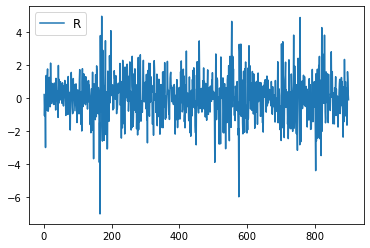

In [7]:
#plotting the R series
plt.plot(dt.R,label='R')
plt.legend(loc='best', fontsize='large')
plt.show()

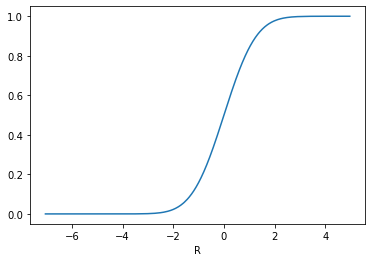

In [8]:
import seaborn as sns
import scipy
#generate samples from normal distribution (discrete data)
norm_cdf = scipy.stats.norm.cdf(dta)
#plot the cdf
sns.lineplot(x=dta, y= norm_cdf)
plt.show()

$\mathbf{q_{0.01}}$

In [9]:
# Lower 1% quantile
np.percentile(dta,1)

-3.084849440036869

$\textbf{Histogram and descriptive statistics}$

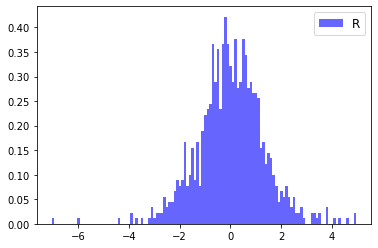

In [10]:
#Plot histogram of R
plt.hist(dta,bins=120,label='R', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

In [11]:
from scipy import stats
stats.describe(dta)

DescribeResult(nobs=900, minmax=(-7.043759037302043, 4.964596183505854), mean=0.023484214502210905, variance=1.69179462409061, skewness=-0.12386168453067394, kurtosis=2.0462044750974355)

In [12]:
stats.jarque_bera(dta)

Jarque_beraResult(statistic=159.3119858057954, pvalue=0.0)

$\textbf{GARCH(1,1)}$

In [13]:
from arch import arch_model

In [14]:
model = arch_model(dta,mean ='Constant', vol ='GARCH', p=1, q=1)
x_1 =model.fit(disp ='off')
x_1

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      R   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1476.78
Distribution:                  Normal   AIC:                           2961.57
Method:            Maximum Likelihood   BIC:                           2980.78
                                        No. Observations:                  900
Date:                Wed, Aug 04 2021   Df Residuals:                      899
Time:                        17:42:41   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0501  4.031e-02      1.242      0.214 [-2.89

In [15]:
#Deriving the absolute value of R
dt_4 = np.abs(df['R']).iloc[0:900]

In [16]:
#defining the GARCH (1,1)'s conditional volatility
dt_1 = x_1.conditional_volatility

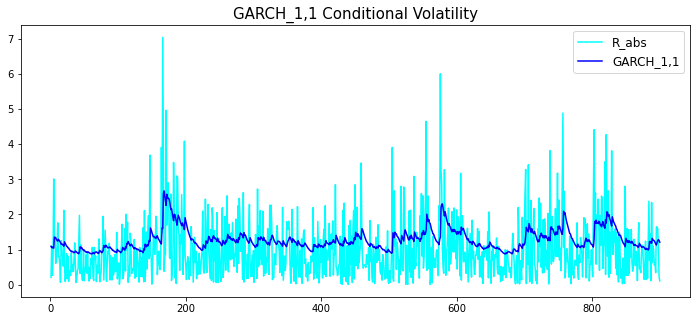

In [17]:
#Plotting the curve
dt_4.plot(figsize=(12,5), color ='aqua',label='R_abs')
dt_1.plot(figsize=(12,5),color='b',label ='GARCH_1,1')
plt.title('GARCH_1,1 Conditional Volatility', size=15)
plt.legend(loc='best', fontsize='large')
plt.show()

$\textbf{GJR}$

In [18]:
model = arch_model(dta,mean ='Constant', vol ='GARCH', p=1, o=1, q=1)
x_2=model.fit(disp='off')
x_2

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                      R   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1449.02
Distribution:                  Normal   AIC:                           2908.04
Method:            Maximum Likelihood   BIC:                           2932.05
                                        No. Observations:                  900
Date:                Wed, Aug 04 2021   Df Residuals:                      899
Time:                        17:42:41   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.4906e-04  4.389e-02 -1.707e-02      0.

In [19]:
#defining the GJR's conditional volatility. 
dt_2 = x_2.conditional_volatility

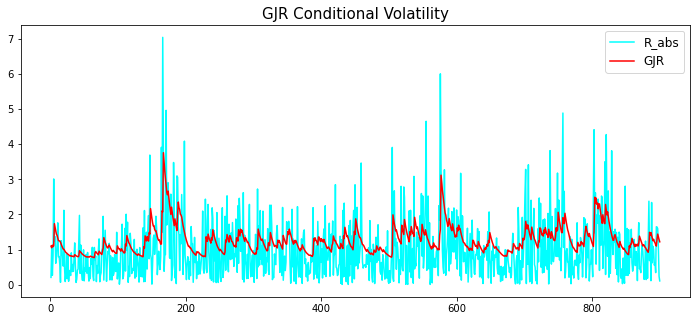

In [20]:
#Plotting the curve
dt_4.plot(figsize=(12,5), color ='aqua',label='R_abs')
dt_2.plot(figsize=(12,5),color='r', label='GJR')
plt.title('GJR Conditional Volatility', size=15)
plt.legend(loc='best', fontsize='large')
plt.show()

$\textbf{EGARCH(1,1)}$

In [21]:
model = arch_model(dta,mean ='Constant', vol ='EGARCH', p=1, o=1, q=1)
x_3=model.fit(disp='off')
x_3

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                      R   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1445.86
Distribution:                  Normal   AIC:                           2901.71
Method:            Maximum Likelihood   BIC:                           2925.73
                                        No. Observations:                  900
Date:                Wed, Aug 04 2021   Df Residuals:                      899
Time:                        17:42:42   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.0310e-03  3.759e-02     -0.187      0.

In [22]:
#defining EGARCH's conditional volatility
dt_3 =x_3.conditional_volatility

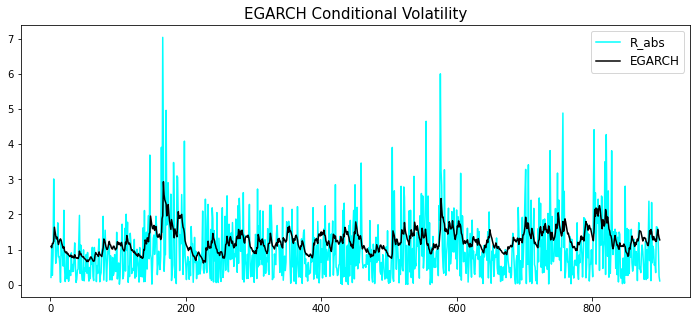

In [23]:
#Plotting the curve
dt_4.plot(figsize=(12,5), color ='aqua',label='R_abs')
dt_3.plot(figsize=(12,5),color='black', label='EGARCH')
plt.title('EGARCH Conditional Volatility', size=15)
plt.legend(loc='best', fontsize='large')
plt.show()

$\textbf{Plotting the comparative chart}$

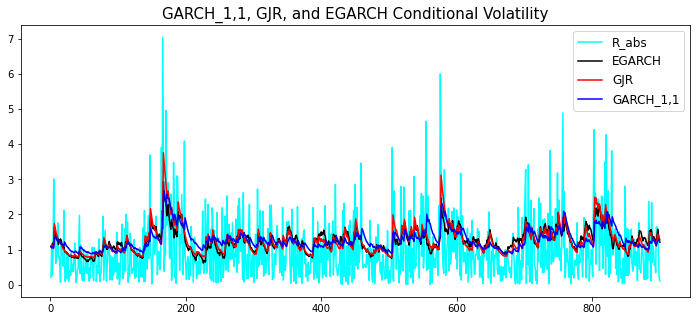

In [24]:
#Plotting the curve
dt_4.plot(figsize=(12,5), color ='aqua',label='R_abs')
dt_3.plot(figsize=(12,5),color='black', label='EGARCH')
dt_2.plot(figsize=(12,5),color='r', label='GJR')
dt_1.plot(figsize=(12,5),color='b',label ='GARCH_1,1')
plt.title('GARCH_1,1, GJR, and EGARCH Conditional Volatility', size=15)
plt.legend(loc='best', fontsize='large')
plt.show()

$\textbf{Standardised Residuals from EGARCH}$

In [25]:
#Residuals
resid =x_3.resid
#Standardised residuals
std_resid =x_3.resid/x_3.conditional_volatility
#Squared standardised residuals
std_rr = std_resid**2

$\textbf{ACF , PACF of Std Residuals}$

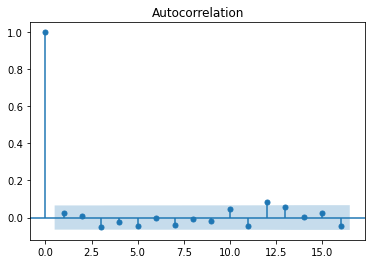

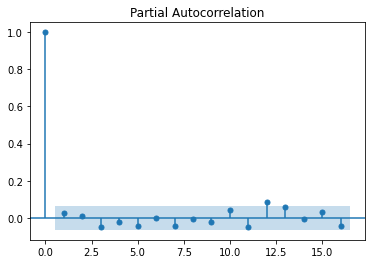

In [26]:
from statsmodels.graphics import tsaplots
fig =tsaplots.plot_acf(std_resid,lags=16)
fig =tsaplots.plot_pacf(std_resid,lags=16)
plt.show()

$\textbf{ACF , PACF of Squared Std Residuals}$

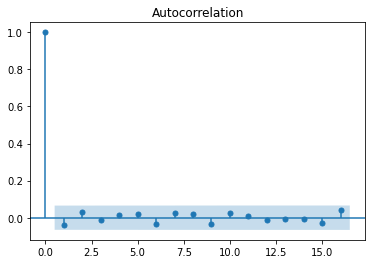

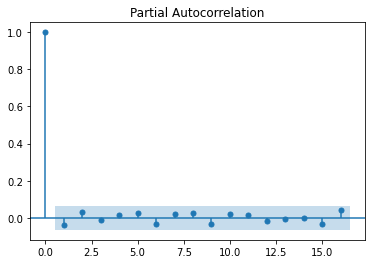

In [27]:

fig =tsaplots.plot_acf(std_rr,lags=16)
fig =tsaplots.plot_pacf(std_rr,lags=16)
plt.show()

$\textbf{Histogram of Residuals}$

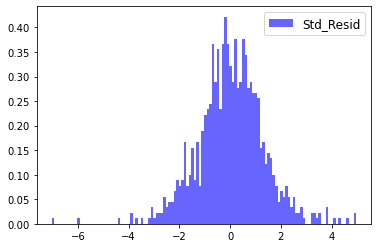

[DescribeResult(nobs=900, minmax=(-7.03672803681913, 4.971627183988767), mean=0.030515214985123693, variance=1.69179462409061, skewness=-0.12386168453067394, kurtosis=2.0462044750974355),
 Jarque_beraResult(statistic=159.3119858057954, pvalue=0.0)]

In [28]:
from scipy import stats
#Historgram of std residuals
plt.hist(resid,bins=120,label='Std_Resid', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()
#stats describe
des =stats.describe(resid)
#Jarque-Bera
jb= stats.jarque_bera(resid)
[des,jb]

$\textbf{Histogram of Standardised Residuals}$

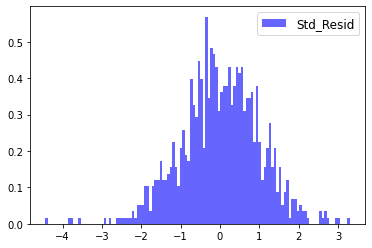

[DescribeResult(nobs=900, minmax=(-4.434663812641812, 3.300542481901695), mean=0.010793005052430329, variance=0.9995651416518812, skewness=-0.23049293446219854, kurtosis=0.7683599989064795),
 Jarque_beraResult(statistic=30.108189722533, pvalue=2.897941883128752e-07)]

In [29]:
from scipy import stats
#Historgram of std residuals
plt.hist(std_resid,bins=120,label='Std_Resid', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()
#stats describe
des =stats.describe(std_resid)
#Jarque-Bera
jb= stats.jarque_bera(std_resid)
[des,jb]

$\textbf{Forecasts}$

In [48]:
forecasts = x_3.forecast()

In [31]:
cond_var =forecasts.residual_variance.iloc[-1:]
cond_var

,h.1
900,1.547786


In [32]:
cond_std = cond_var**0.5
cond_std

,h.1
900,1.2441


In [33]:
cond_mean = forecasts.mean.tail(1)
cond_mean

,h.1
900,-0.007031


$\textbf{Value-at-Risk(VaR)}$

In [34]:
q = std_resid.quantile(0.01)
q

-2.4235108274712114

$\textbf{VaR = (c+ $q_{0.01}\sigma_{t+1})\times$ P/100}$

In [35]:
P = 10000000
VaR = (cond_mean+np.sqrt(cond_var)*q)*P/100
VaR.tail(1)

,h.1
900,-302212.165409


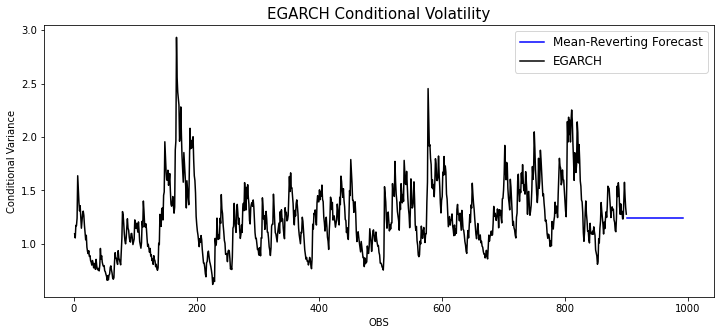

In [47]:
dt_insample = df[0:899]
dt_outsample= df[900:993]
from arch.__future__ import reindexing
rolling_predictions = []
test_size = len(dt_outsample)
for i in range(test_size):
    train = df[:-(test_size-i)]
    model = arch_model(dta,mean ='Constant', vol ='EGARCH', p=1, o=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=df.index[-test_size:])
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions,color='blue', label='Mean-Reverting Forecast')
dt_3.plot(figsize=(12,5),color='black', label='EGARCH')
plt.title('EGARCH Conditional Volatility', size=15)
plt.legend(loc='best', fontsize='large')
plt.ylabel('Conditional Variance')
plt.xlabel('OBS')
plt.show()